In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])

one_hot_encoded_data.dtypes

Age                                  int64
FraudFound_P                         int64
Days_Policy_Accident               float64
Days_Policy_Claim                  float64
AgeOfVehicle                       float64
Sex_Female                           uint8
Sex_Male                             uint8
MaritalStatus_Divorced               uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
MaritalStatus_Widow                  uint8
Fault_Policy Holder                  uint8
Fault_Third Party                    uint8
PolicyType_Sedan - All Perils        uint8
PolicyType_Sedan - Collision         uint8
PolicyType_Sedan - Liability         uint8
PolicyType_Sport - All Perils        uint8
PolicyType_Sport - Collision         uint8
PolicyType_Sport - Liability         uint8
PolicyType_Utility - All Perils      uint8
PolicyType_Utility - Collision       uint8
PolicyType_Utility - Liability       uint8
VehicleCategory_Sedan                uint8
VehicleCate

In [2]:
! pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\thanuja\appdata\local\conda\conda\envs\fyp\lib\site-packages (0.10.1)


In [3]:
x = one_hot_encoded_data.drop("FraudFound_P", axis=1)
y = one_hot_encoded_data["FraudFound_P"]

In [4]:
y.value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

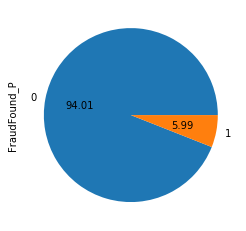

In [5]:
y.value_counts().plot.pie(autopct = '%.2f')

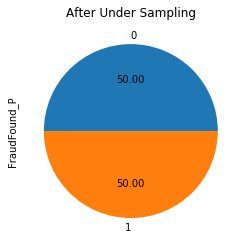

In [6]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy = 1)
x_res, y_res = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("After Under Sampling")

In [7]:
y_res.value_counts()

0    923
1    923
Name: FraudFound_P, dtype: int64

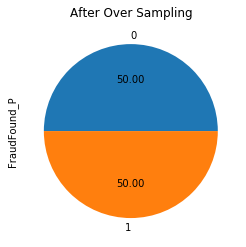

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")
x_res, y_res = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("After Over Sampling")

In [9]:
y_res.value_counts()

0    14497
1    14497
Name: FraudFound_P, dtype: int64